In [3]:
import numpy as np
import time, os, sys
from glob import glob
from urllib.parse import urlparse
import skimage.io
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['figure.dpi'] = 96
from cellpose import utils

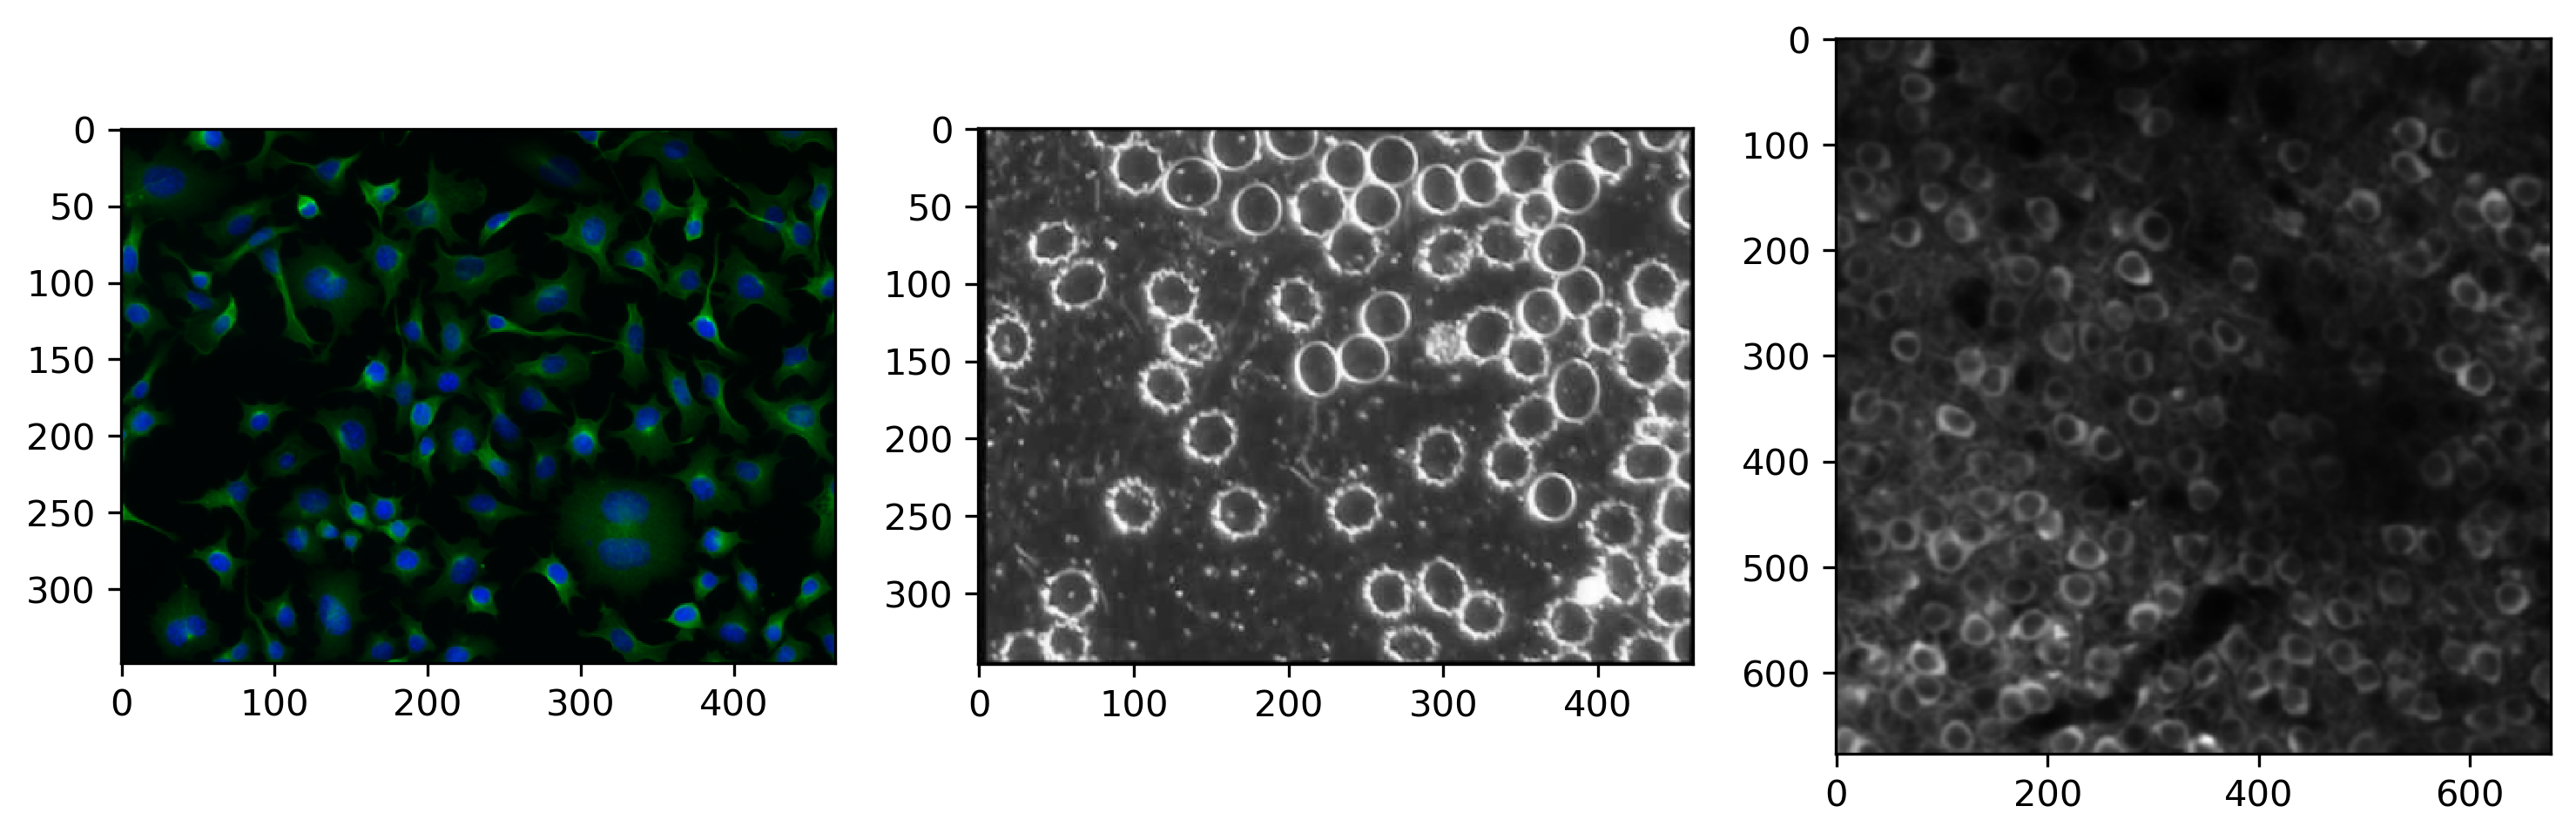

In [1]:
# I will download images from website
urls = ['http://www.cellpose.org/static/images/img02.png',
        'http://www.cellpose.org/static/images/img03.png',
        'http://www.cellpose.org/static/images/img05.png']
files = []
for url in urls:
    parts = urlparse(url)
    filename = os.path.basename(parts.path)
    if not os.path.exists(filename):
        sys.stderr.write('Downloading: "{}" to {}\n'.format(url, filename))
        utils.download_url_to_file(url, filename)
    files.append(filename)

# REPLACE FILES WITH YOUR IMAGE PATHS
# files = ['img0.tif', 'img1.tif']
    
imgs = [skimage.io.imread(f) for f in files]
nimg = len(imgs)

plt.figure(figsize=(12,4))
for k,img in enumerate(imgs):
    plt.subplot(1,3,k+1)
    plt.imshow(img)

In [20]:
HOME = '/home/qzt'
# PATH = "data/dsb2018/dsb2018_sub1/"
PATH = "data/centuri/train/"
# path = os.path.join(HOME, "data/dsb2018/dsb2018_sub1/images/*.tif")
pathX = os.path.join(HOME, PATH+"images/*.tif")
# pathY = os.path.join(HOME, PATH+"masks/*.tif")
X_file = sorted(glob(pathX))
# Y_file = sorted(glob(pathY))

X = list(map(skimage.io.imread,X_file))
print(len(X))

5


In [44]:
imgs = X[0:2]

In [22]:
# RUN CELLPOSE

from cellpose import models

# DEFINE CELLPOSE MODEL
# model_type='cyto' or model_type='nuclei'
# model = models.Cellpose(gpu=False, model_type='cyto')
model = models.Cellpose(gpu=False, model_type='nuclei')

# define CHANNELS to run segementation on
# grayscale=0, R=1, G=2, B=3
# channels = [cytoplasm, nucleus]
# if NUCLEUS channel does not exist, set the second channel to 0
# channels = [0,0]
# IF ALL YOUR IMAGES ARE THE SAME TYPE, you can give a list with 2 elements
# channels = [0,0] # IF YOU HAVE GRAYSCALE
# channels = [2,3] # IF YOU HAVE G=cytoplasm and B=nucleus
# channels = [2,1] # IF YOU HAVE G=cytoplasm and R=nucleus

# or if you have different types of channels in each image
# channels = [[2,3], [0,0], [0,0]]
channels=[0,0]

print(len(imgs),imgs[0].shape)
# if diameter is set to None, the size of the cells is estimated on a per image basis
# you can set the average cell `diameter` in pixels yourself (recommended) 
# diameter can be a list or a single number for all images
masks, flows, styles, diams = model.eval(imgs, diameter=None, channels=[0,0], tile=True, net_avg=False)
print(diams)

  0%|          | 0/5 [00:00<?, ?it/s]

>>>> using CPU
5 (1022, 1022)
processing 5 images


  0%|          | 0/5 [00:00<?, ?it/s]

estimated cell diameters for all images


100%|██████████| 5/5 [00:43<00:00,  8.62s/it]

[62.95183487 67.42948321 21.20031979 13.15904928 18.88139488]


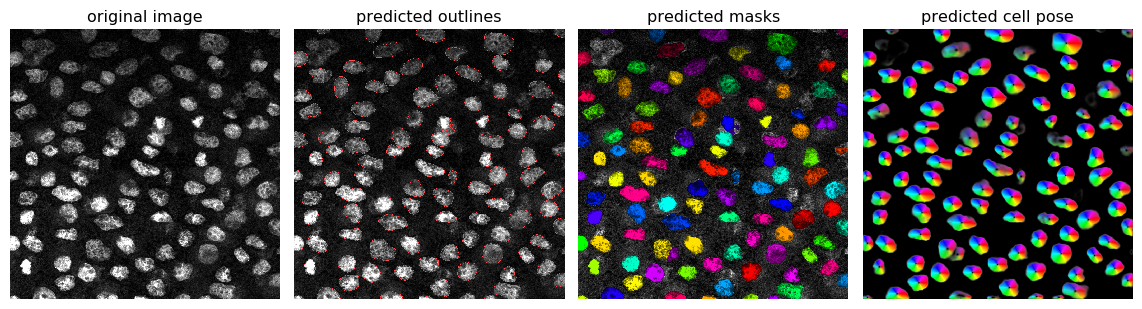

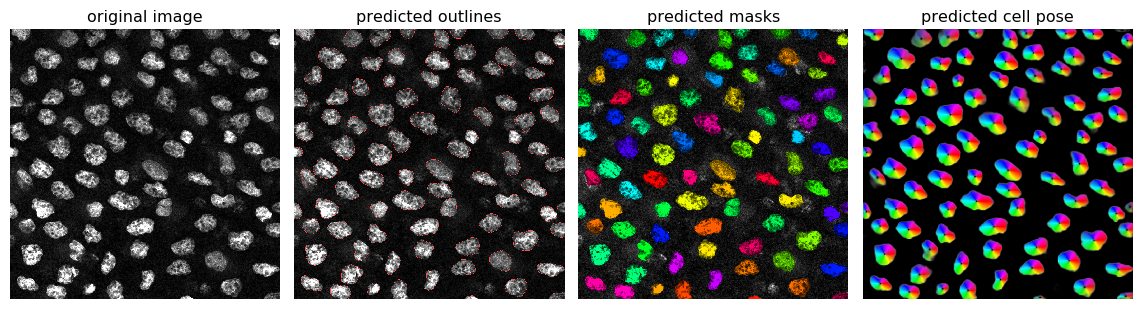

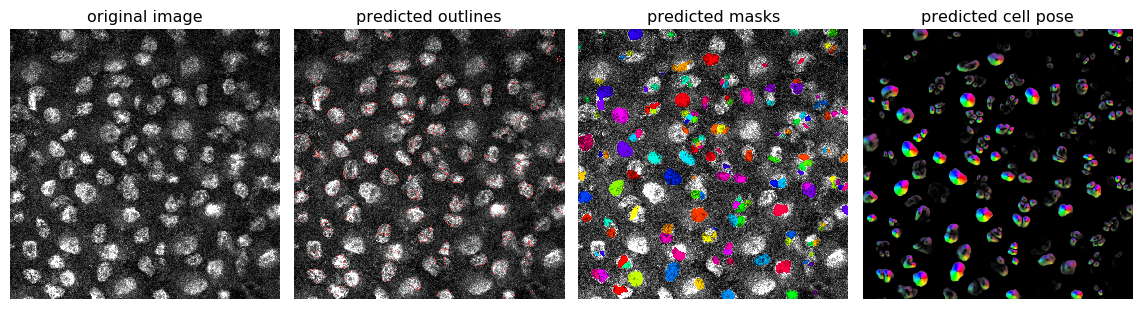

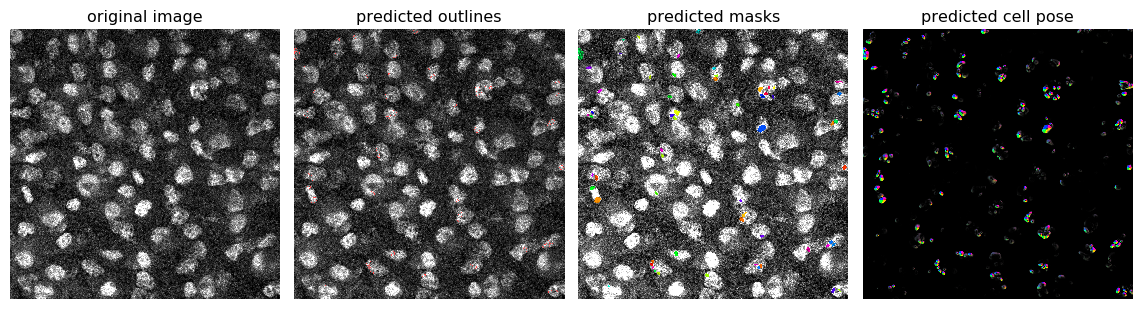

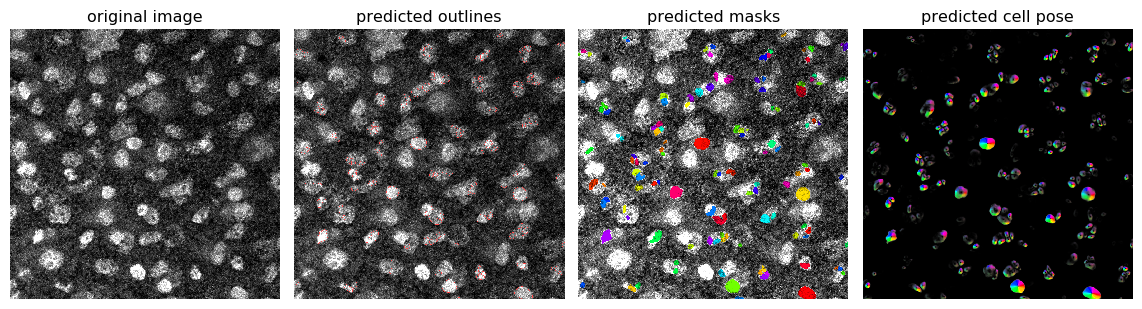

In [24]:
# DISPLAY RESULTS
from cellpose import plot

nimg = len(imgs)
for idx in range(nimg):
    maski = masks[idx]
    flowi = flows[idx][0]

    fig = plt.figure(figsize=(12,5))
    plot.show_segmentation(fig, imgs[idx], maski, flowi, channels=[0,0])
    plt.tight_layout()
    plt.show()

In [45]:
masks, flows, styles, diams = model.eval(imgs, diameter=65, channels=[0,0], tile=True, net_avg=True, flow_threshold=0.0)
print(diams)

  0%|          | 0/2 [00:00<?, ?it/s]

processing 2 images


100%|██████████| 2/2 [00:14<00:00,  7.22s/it]

[65. 65.]


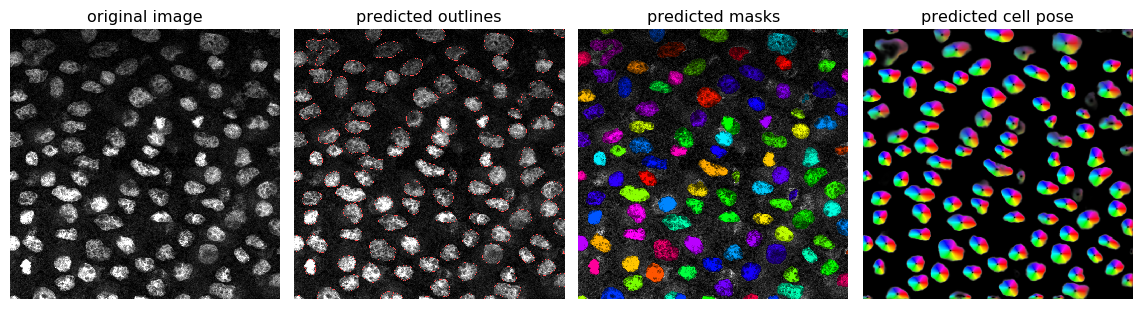

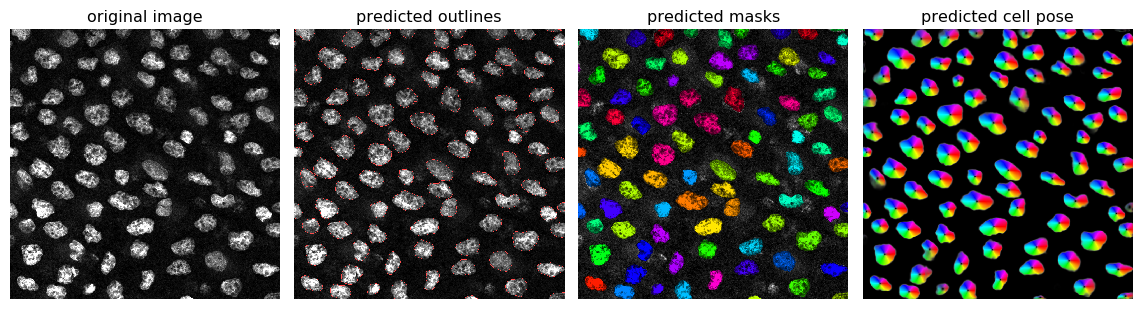

In [46]:
# DISPLAY RESULTS
from cellpose import plot

nimg = len(imgs)
for idx in range(nimg):
    maski = masks[idx]
    flowi = flows[idx][0]

    fig = plt.figure(figsize=(12,5))
    plot.show_segmentation(fig, imgs[idx], maski, flowi, channels=[0,0])
    plt.tight_layout()
    plt.show()

In [39]:
flow0 = flows[0]

In [41]:
flow0[2].shape

(1022, 1022)

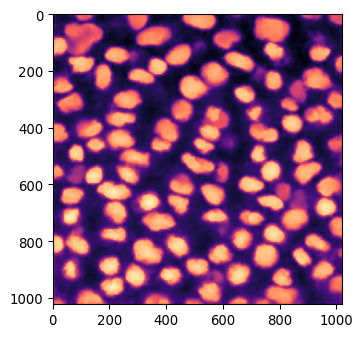

In [43]:
plt.imshow(flow0[2], cmap='magma')

In [51]:
dP = flow0[1]
dP.max(), dP.min()

(5.0810924, -5.03786)

In [52]:
dPn = (dP-dP.min())/(dP.max()-dP.min())

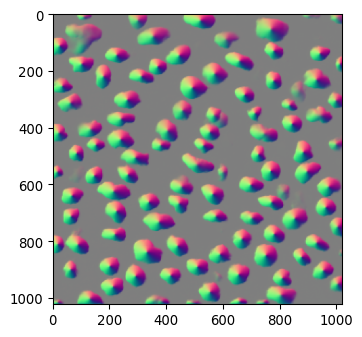

In [53]:
plt.imshow(np.transpose(dPn, (1,2,0)))

In [66]:
p = flow0[3]
p.max(), p.min()
pn = p/p.max()

In [67]:
pn.shape

(2, 1022, 1022)

In [68]:
pn = np.concatenate((pn, np.zeros((1,pn.shape[1],pn.shape[2]), np.uint8)), axis=0)
pn.shape

(3, 1022, 1022)

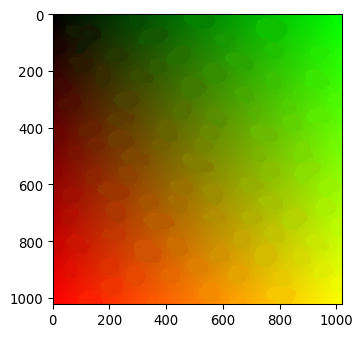

In [69]:
plt.imshow(np.transpose(pn, (1,2,0)))

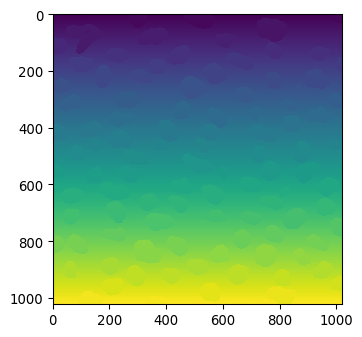

In [71]:
plt.imshow(pn[0,...])

## Test the flow dynamics functions

flows.append([flow, dP, cellprob, p])

In [ ]:
flow=flows[0]
dP = flow[]